In [1]:
import pandas as pd

# 读取文件
file_path = "WY_计算随访时间_cataract_更新的截止时间.csv"
df = pd.read_csv(file_path)

# ===========================================
# 字段标准化映射表（原始字段 → 统一字段）
# ===========================================
column_mapping = {
    # 1. 人口学与社会经济学特征
    "sex": "sex",
    "ethnic_background": "ethnic_background",
    "ethnic_l": "ethnic_l",
    "ethnic": "ethnic",
    "education_bl": "education_baseline",
    "age_bl": "age_baseline",

    # 2. 生活方式与行为因素
    "csmoking_bl": "smoking_status_baseline",
    "alcohol_freq_bl": "alcohol_frequency_baseline",
    "alcohol_bl": "alcohol_frequency_baseline",
    "sleep_dur_bl": "sleep_duration_baseline",

    # 3. 人体测量学指标
    "bmi_bl": "bmi_baseline",
    "obesity": "obesity_status",

    # 4. 基线健康状况
    "diabetes_bl": "diabetes_baseline",
    "hypertension_bl": "hypertension_baseline",
    "heart_attack_bl": "myocardial_infarction_baseline",
    "heart_failure_bl": "heart_failure_baseline",
    "stroke_bl": "stroke_baseline",
    "kidney_stone_bl": "kidney_stone_baseline",
    "depression_bl": "depression_baseline",
    "cancer_bl": "cancer_baseline",
    "heart_disease": "heart_disease_composite",

    # 5. 眼科疾病基线状态
    "amd_bl": "amd_baseline",
    "amd_bl1": "amd_baseline1",
    "amd_blt": "amd_baseline2",
    "cataract_bl": "cataract_baseline",
    "glaucoma_bl": "glaucoma_baseline",
    "gla_blt": "glaucoma_baseline",
    "diabetic_eye_bl": "diabetic_retinopathy_baseline",
    "dr_bl": "diabetic_retinopathy_baseline",
    "dr_blt": "diabetic_retinopathy_baseline",

    # 6. 实验室检测指标
    "hba1c_bl": "hba1c_baseline",
    "total_cholesterol": "total_cholesterol",
    "ldl_cholesterol": "ldl_cholesterol",
    "hdl_cholesterol": "hdl_cholesterol",
    "triglycerides": "triglycerides",

    # 7. 脂肪酸代谢指标
    "total_fa": "fatty_acids_total",
    "n3fa": "fatty_acids_n3",
    "n6fa": "fatty_acids_n6",
    "pufa": "fatty_acids_pufa",
    "mufa": "fatty_acids_mufa",
    "sfa": "fatty_acids_sfa",
    "la": "fatty_acids_la",
    "dha": "fatty_acids_dha",

    # 8. 遗传风险评分
    "n3fa_grs": "grs_n3fa",
    "n6fa_grs": "grs_n6fa",
    "pufa_grs": "grs_pufa",
    "tfa_grs": "grs_total_fa",

    # 9. 年龄分层分类
    "age_layer2": "age_quantile_2",
    "age50": "age_threshold_50",
    "age57": "age_threshold_57",
    "age60": "age_threshold_60",

    # 10. 随访与时间变量
    "date_interview": "interview_date",
    "date_interview_time": "interview_date",
    "lastdate": "last_followup_date",
    "followup_cataract_yrs": "followup_duration_cataract",
    "followup_cataract": "followup_duration_cataract",
    "followup_cataract_182": "followup_duration_cataract",
    "followdate_cataract": "followup_date_cataract",
    "eligible": "eligible_status",

    # 11. 疾病发病与结局事件
    "amd_onset": "amd_onset_date",
    "amd_onset_date": "amd_onset_date",
    "amd_onset_time": "amd_onset_date",
    "amd_days": "amd_time_to_event_days",
    "cataract_onset": "cataract_onset_date",
    "cataract_onset_date": "cataract_onset_date",
    "cataract_days": "cataract_time_to_event_days",
    "incident_cataract": "cataract_incident",
    "diabetic_eye_onset": "diabetic_eye_onset_date",
    "diabetic_eye_onset_date": "diabetic_eye_onset_date",
    "diabetic_eye_days": "diabetic_eye_time_to_event_days",
    "glaucoma_onset": "glaucoma_onset_date",
    "glaucoma_onset_date": "glaucoma_onset_date",
    "glaucoma_days": "glaucoma_time_to_event_days",

    # 12. 模型输出
    "amd_prediction": "amd_risk_prediction",
    "cataract_prediction": "cataract_risk_prediction",
    "diabetic_eye_prediction": "diabetic_eye_risk_prediction",
    "glaucoma_prediction": "glaucoma_risk_prediction",

    # 13. 数据管理标识
    "f_eid": "participant_id",
    "analysis_fa": "analysis_flag_fatty_acids",
    "metabolomic_age": "metabolomic_age",
}

# ==================================================
# 自动将 df 的列名映射到新名称（若存在）
# ==================================================
df = df.rename(columns={orig: new for orig, new in column_mapping.items() if orig in df.columns})

# 输出前 5 行，确认成功读取
print(df.head())

# 输出列名，确认字段统一
print("\n统一后的字段名：")
print(df.columns.tolist())


   ethnic_background  sex  education_baseline  sleep_duration_baseline  \
0               1001    1                   1                        7   
1               1002    1                   3                        7   
2               1001    1                   0                        7   
3               1001    0                   5                        8   
4               1001    1                   0                       12   

   smoking_status_baseline  alcohol_frequency_baseline  bmi_baseline  \
0                      2.0                         3.0          27.2   
1                      2.0                         3.0          22.8   
2                      0.0                         2.0          28.6   
3                      0.0                         5.0          34.0   
4                      2.0                         6.0          20.0   

   age_baseline  diabetes_baseline  cancer_baseline  ...  \
0            43                  0              0.0  ...   
1 

步骤0 - 初始人数: 174,614 人

【步骤1 - 排除早已发病(<183 天)】
排除前: 174,614 人
排除后: 164,453 人
减少人数: 10,161 人

【步骤2 - 筛选脂肪酸数据完整的人群】
脂肪酸列: ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6', 'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa', 'fatty_acids_la', 'fatty_acids_dha']
筛选前: 164,453 人
筛选后: 35,648 人
减少人数: 128,805 人

【步骤3 - 筛选最终有效人群】
保留: >=183天（晚期发病组）和空值（未发病组）
排除: <183天（早期发病组）
筛选前: 35,648 人
筛选后: 35,648 人
减少人数: 0 人

【步骤4 - 创建分组变量】
发病组(>=183天): 3,770 人
对照组(空值): 31,878 人
总计: 35,648 人
发病组内：早期(<183天)=0，晚期(>=183天)=3,770

⚠️  发现缺失值:
age_baseline                 0
sex                          0
smoking_status_baseline    162
dtype: int64
正在剔除含缺失值的记录...
清理前: 35,648 人
清理后: 35,486 人
减少人数: 162 人

【倾向评分模型】
模型系数: {'age': np.float64(1.0041231721093755), 'sex': np.float64(-0.14653385624517842), 'smoking_status_baseline': np.float64(0.02224473591481551)}
模型截距: -2.4877
模型样本数: 35,486

【OR值解读】
age: OR=2.73
sex: OR=0.86
smoking_status_baseline: OR=1.02

【开始1:1最近邻匹配】
卡尺值: 0.1
成功匹配对数: 3744
匹配后总样本数: 7,488
病例组

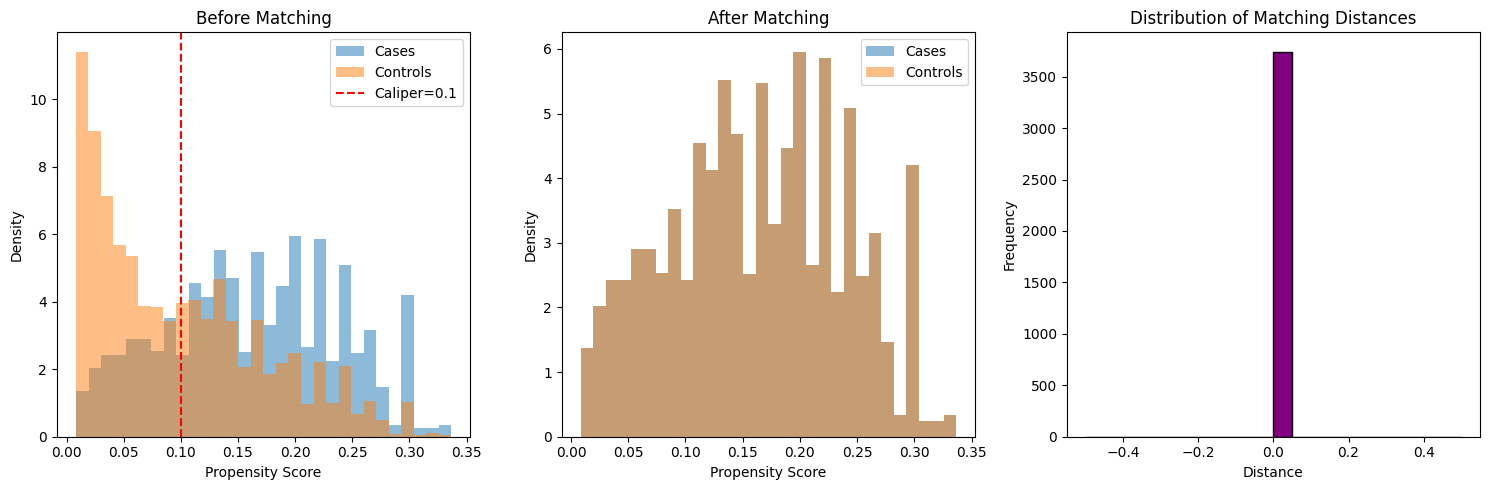

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# =================================================
# 1. 数据准备与分组
# =================================================
# 步骤0: 打印初始人数（基于最原始的数据）
initial_n = len(df)
print(f"=" * 65)
print(f"步骤0 - 初始人数: {initial_n:,} 人")
print("=" * 65)

# 创建二分类变量：是否发病
cataract_days_col = 'cataract_time_to_event_days'

if cataract_days_col not in df.columns:
    print(f"❌ 错误：列 '{cataract_days_col}' 不存在！")
else:
    # =================================================
    # 步骤1: 第一步就筛选掉早已发病的记录 (cataract_days < 183)
    # =================================================
    print("\n【步骤1 - 排除早已发病(<183 天)】")
    pre_step1_n = len(df)
    
    # 直接排除所有 cataract_days < 183 的记录
    df_step1 = df[~(df[cataract_days_col] < 183)].copy()
    
    after_step1_n = len(df_step1)
    removed_step1_n = pre_step1_n - after_step1_n
    
    print(f"排除前: {pre_step1_n:,} 人")
    print(f"排除后: {after_step1_n:,} 人")
    print(f"减少人数: {removed_step1_n:,} 人")
    print("=" * 65)
    
    # =================================================
    
    # 步骤2: 去掉脂肪酸数据不完整的，创建 df_fa_complete
    # =================================================
    print("\n【步骤2 - 筛选脂肪酸数据完整的人群】")
    
    # 定义脂肪酸核心列
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    
    # 检查哪些列实际存在
    existing_fa_core = [col for col in fa_core_cols if col in df_step1.columns]
    
    if not existing_fa_core:
        print("⚠️  警告：未找到任何脂肪酸数据列！")
    
    pre_step2_n = len(df_step1)
    
    # 剔除脂肪酸数据不完整的记录 
    df_fa_complete = df_step1.dropna(subset=existing_fa_core).copy()
    
    after_step2_n = len(df_fa_complete)
    removed_step2_n = pre_step2_n - after_step2_n
    
    print(f"脂肪酸列: {existing_fa_core}")
    print(f"筛选前: {pre_step2_n:,} 人")
    print(f"筛选后: {after_step2_n:,} 人")
    print(f"减少人数: {removed_step2_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤3: 筛选有效人群（只保留>180天和空值）
    # =================================================
    print("\n【步骤3 - 筛选最终有效人群】")
    print("保留: >=183天（晚期发病组）和空值（未发病组）")
    print("排除: <183天（早期发病组）")
    
    pre_step3_n = len(df_fa_complete)
    
    # 创建筛选掩码：只保留 >=183 或 空值
    valid_mask = (
        (df_fa_complete[cataract_days_col] >= 183) | 
        (df_fa_complete[cataract_days_col].isna())
    )
    df_fa_complete = df_fa_complete[valid_mask].copy()
    
    after_step3_n = len(df_fa_complete)
    removed_step3_n = pre_step3_n - after_step3_n
    
    print(f"筛选前: {pre_step3_n:,} 人")
    print(f"筛选后: {after_step3_n:,} 人")
    print(f"减少人数: {removed_step3_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤4: 创建分组变量并准备PSM数据
    # =================================================
    print("\n【步骤4 - 创建分组变量】")
    
    # 创建二分类分组变量
    df_fa_complete['cataract_event'] = np.where(
        df_fa_complete[cataract_days_col] > 0,
        1,  # 发病组（>=183天）
        0   # 未发病组（空值）
    )
    
    # 复制数据用于PSM分析
    df_psm = df_fa_complete.copy()
    
    # 定义PSM分组变量
    df_psm['cataract_group'] = df_psm['cataract_event']
    
    # 检查分组样本量
    n_case = df_psm['cataract_group'].sum()
    n_control = (df_psm['cataract_group'] == 0).sum()
    
    print(f"发病组(>=183天): {n_case:,} 人")
    print(f"对照组(空值): {n_control:,} 人")
    print(f"总计: {len(df_psm):,} 人")
    print("=" * 65)
    
    # 统计发病组内时间分布
    days_series = df_psm.loc[df_psm['cataract_event'] == 1, cataract_days_col]
    early_count = (days_series < 183).sum()
    late_count = (days_series >= 183).sum()
    print(f"发病组内：早期(<183天)={early_count:,}，晚期(>=183天)={late_count:,}")
    print("=" * 65)
    
   # =================================================
    # 5. 倾向评分计算
    # =================================================
    # 匹配变量：年龄、性别和吸烟状态
    match_vars = ['age_baseline', 'sex', 'smoking_status_baseline']

    # 检查缺失值并清理
    missing_count = df_psm[match_vars].isnull().sum()
    if missing_count.any():
        print(f"\n⚠️  发现缺失值:\n{missing_count}")
        print("正在剔除含缺失值的记录...")
        clean_mask = df_psm[match_vars].notna().all(axis=1)
        pre_clean_n = len(df_psm)
        df_psm = df_psm[clean_mask].copy()
        after_clean_n = len(df_psm)
        removed_clean_n = pre_clean_n - after_clean_n
        print(f"清理前: {pre_clean_n:,} 人")
        print(f"清理后: {after_clean_n:,} 人")
        print(f"减少人数: {removed_clean_n:,} 人")

    # 对 df_psm 的 sex 列进行编码（关键修复）
    if df_psm['sex'].dtype == 'object':
        df_psm['sex'] = df_psm['sex'].astype(str).str.strip()
        df_psm['sex'] = df_psm['sex'].map({'Female': 0, 'Male': 1})
    elif isinstance(df_psm['sex'].dtype, pd.CategoricalDtype):
        df_psm['sex'] = df_psm['sex'].cat.codes

    # 提取特征和标签
    # X 是 年龄 + 性别 + 吸烟状态
    # y 是 是否发病
    X = df_psm[match_vars].copy()
    y = df_psm['cataract_group']

    # 标准化连续变量
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 逻辑回归
    ps_model = LogisticRegression(random_state=42, max_iter=1000)
    ps_model.fit(X_scaled, y)

    # 预测倾向评分（所有人）
    df_psm['propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]

    # 保存倾向评分模型信息
    model_info = {
        'variables': match_vars,
        'coefficients': dict(zip(['age', 'sex', 'smoking_status_baseline'], ps_model.coef_[0])),
        'intercept': ps_model.intercept_[0],
        'n_samples': len(df_psm)
    }

    print("\n【倾向评分模型】")
    print(f"模型系数: {model_info['coefficients']}")
    print(f"模型截距: {model_info['intercept']:.4f}")
    print(f"模型样本数: {model_info['n_samples']:,}")

    # 计算OR值
    import math
    print("\n【OR值解读】")
    for var, coef in model_info['coefficients'].items():
        or_value = math.exp(coef)
        print(f"{var}: OR={or_value:.2f}")
    # =================================================
    # 6. 1:1最近邻匹配（卡尺0.1）
    # =================================================
    case_df = df_psm[df_psm['cataract_group'] == 1].copy()
    control_df = df_psm[df_psm['cataract_group'] == 0].copy()
    
    print("\n" + "=" * 65)
    print("【开始1:1最近邻匹配】")
    print(f"卡尺值: 0.1")
    print("=" * 65)
    
    # 计算距离矩阵
    case_ps = case_df['propensity_score'].values.reshape(-1, 1)
    control_ps = control_df['propensity_score'].values.reshape(-1, 1)
    distances = cdist(case_ps, control_ps, metric='euclidean')
    
    # 执行匹配
    matched_pairs = []
    used_controls = set()
    
    for i, case_id in enumerate(case_df['participant_id']):
        case_score = case_df.iloc[i]['propensity_score']
        
        # 找到最近邻
        sorted_indices = np.argsort(distances[i])
        for j in sorted_indices:
            control_id = control_df.iloc[j]['participant_id']
            
            if control_id not in used_controls:
                distance = distances[i, j]
                # 卡尺判断
                if abs(case_score - control_df.iloc[j]['propensity_score']) < 0.1:
                    matched_pairs.append({
                        'case_id': case_id,
                        'control_id': control_id,
                        'distance': distance,
                        'case_ps': case_score,
                        'control_ps': control_df.iloc[j]['propensity_score']
                    })
                    used_controls.add(control_id)
                    break
    
    print(f"成功匹配对数: {len(matched_pairs)}")
    
    if len(matched_pairs) < len(case_df):
        print(f"⚠️  警告: 有 {len(case_df) - len(matched_pairs)} 例病例未找到匹配对照")
    
    # 创建匹配数据集
    matched_case_ids = [p['case_id'] for p in matched_pairs]
    matched_control_ids = [p['control_id'] for p in matched_pairs]
    
    df_matched = df_psm[df_psm['participant_id'].isin(matched_case_ids + matched_control_ids)].copy()
    
    # 添加匹配标识
    df_matched['matched_pair_id'] = df_matched['participant_id'].map(
        {**{p['case_id']: i for i, p in enumerate(matched_pairs)},
         **{p['control_id']: i for i, p in enumerate(matched_pairs)}}
    )
    df_matched['is_case'] = df_matched['participant_id'].isin(matched_case_ids).astype(int)
    
    print(f"匹配后总样本数: {len(df_matched):,}")
    print(f"病例组: {len(matched_case_ids):,}")
    print(f"对照组: {len(matched_control_ids):,}")
    print("=" * 65)
    
    # =================================================
    # 7. 匹配质量评估（SMD）
    # =================================================
    print("\n" + "=" * 65)
    print("【匹配质量评估 - 标准化均数差（SMD）】")
    print("=" * 65)
    
    def calculate_smd(group1, group2, continuous=True):
        """计算标准化均数差"""
        if continuous:
            mean_diff = group1.mean() - group2.mean()
            pooled_sd = np.sqrt(((len(group1)-1)*group1.std()**2 + 
                                 (len(group2)-1)*group2.std()**2) / 
                                (len(group1)+len(group2)-2))
            return abs(mean_diff) / pooled_sd
        else:
            p1 = group1.mean()
            p2 = group2.mean()
            return abs(p1 - p2) / np.sqrt((p1*(1-p1) + p2*(1-p2)) / 2)
    
    smd_results = []
    for var in match_vars:
        # 匹配前
        case_before = df_psm[df_psm['cataract_group'] == 1][var]
        control_before = df_psm[df_psm['cataract_group'] == 0][var]
        smd_before = calculate_smd(case_before, control_before, 
                                   continuous=(var != 'sex'))
        
        # 匹配后
        case_after = df_matched[df_matched['is_case'] == 1][var]
        control_after = df_matched[df_matched['is_case'] == 0][var]
        smd_after = calculate_smd(case_after, control_after, 
                                  continuous=(var != 'sex'))
        
        print(f"{var}:")
        print(f" 匹配前SMD: {smd_before:.4f} {'✅' if smd_before < 0.1 else '❌'}")
        print(f" 匹配后SMD: {smd_after:.4f} {'✅' if smd_after < 0.1 else '❌'}")
        
        smd_results.append({
            'variable': var,
            'smd_before': smd_before,
            'smd_after': smd_after
        })
    
    # =================================================
    # 8. 亚组分析（保持不变）
    # =================================================
    # 按年龄分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按年龄分层】")
    print("=" * 65)
    
    df_matched['age_group'] = pd.cut(
        df_matched['age_baseline'], 
        bins=[0, 50, 60, 70, 100], 
        labels=['<50', '50-59', '60-69', '≥70']
    )
    
    age_subgroup = []
    for age_grp, group in df_matched.groupby('age_group'):
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{age_grp}岁组: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        age_subgroup.append({
            'age_group': str(age_grp),
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # 按性别分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按性别分层】")
    print("=" * 65)
    
    sex_subgroup = []
    for sex_val, group in df_matched.groupby('sex'):
        sex_label = 'Female' if sex_val == 0 else 'Male'
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{sex_label}: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        sex_subgroup.append({
            'sex': sex_label,
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # =================================================
    # 9. 可视化（保持不变）
    # =================================================
    plt.figure(figsize=(15, 5))
    
    # 倾向评分分布  
    plt.subplot(1, 3, 1)
    plt.hist(df_psm[df_psm['cataract_group']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_psm[df_psm['cataract_group']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.axvline(x=0.1, color='red', linestyle='--', label='Caliper=0.1')
    plt.title("Before Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配后分布
    plt.subplot(1, 3, 2)
    plt.hist(df_matched[df_matched['is_case']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_matched[df_matched['is_case']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.title("After Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配对距离分布
    distances = [p['distance'] for p in matched_pairs]
    plt.subplot(1, 3, 3)
    plt.hist(distances, bins=20, color='purple', edgecolor='black')
    plt.title("Distribution of Matching Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

In [3]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact
from IPython.display import display

# -------------------------
# 辅助函数
# -------------------------
# ===============================
# ★ 新增：Z-score 标准化
# ===============================
def zscore_by_ref(series, mean, std):
    if std == 0 or np.isnan(std):
        return series * np.nan
    return (series - mean) / std
def format_p(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def fmt_mean_sd(series):
    series = series.dropna()
    if len(series) == 0:
        return ""
    return f"{series.mean():.2f} ± {series.std(ddof=1):.2f}"

def fmt_n_pct(n, total):
    if total == 0 or np.isnan(total):
        return f"{int(n)} (0.00%)"
    return f"{int(n)} ({n/total*100:.2f}%)"

def p_value_continuous(x1, x2):
    x1 = x1.dropna()
    x2 = x2.dropna()
    if len(x1)<2 or len(x2)<2:
        return np.nan
    try:
        _, p = ttest_ind(x1, x2, equal_var=False, nan_policy='omit')
        return p
    except:
        return np.nan

def p_value_categorical(tab):
    if tab.empty:
        return np.nan
    if tab.shape[0]==2 and tab.shape[1]==2:
        try:
            return fisher_exact(tab.values.astype(int))[1]
        except:
            return chi2_contingency(tab.values.astype(int))[1]
    else:
        try:
            return chi2_contingency(tab.values.astype(int))[1]
        except:
            return np.nan

# -------------------------
# 构建 Table1
# -------------------------
def build_table1_psm(df_before, df_after,
                     group_before='cataract_group',
                     group_after='is_case',
                     group_labels=('对照组','白内障组')):

    # ---------- 去除重复列 ----------
    df_before = df_before.loc[:, ~df_before.columns.duplicated()]
    df_after = df_after.loc[:, ~df_after.columns.duplicated()]

    rows = []

    # ===============================
    # ★ 修改点 1：education_baseline 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'education_baseline' in df.columns:
            df['education_bin'] = df['education_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ education_bin：
    #   1 = College / University
    #   0 = Others（包括 0 / 2 / 3 / NaN）

    # ===============================
    # ★ 修改点 2：Smoking status 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'smoker' in df.columns:
            df['Smoking status'] = df['smoker'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never
    #   qita  = Current

    # ===============================
    # ★ 修改点 3：Alcohol use 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'alcohol_frequency_baseline' in df.columns:
            df['Alcohol use'] = df['alcohol_frequency_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never/occasional
    #   qita  = Frequent

    # ===============================
    # ★ 新增：AMD / Glaucoma / Diabetes 统一二分类重编码
    # ===============================
    for df in [df_before, df_after]:

        if 'amd_baseline' in df.columns:
            df['amd'] = df['amd_baseline'].apply(
                lambda x: 0 if x == 0 else 1
            )

        if 'glaucoma_baseline' in df.columns:
            df['glaucoma'] = df['glaucoma_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )

        if 'diabetic_retinopathy_baseline' in df.columns:
            df['diabetes'] = df['diabetic_retinopathy_baseline'].apply(
                lambda x: 1 if x == 1 else 0
        )
    # ---------- 连续变量 ----------
    continuous_vars = {
        'age_baseline': 'Age in years, mean (SD)',
        'bmi_baseline': 'BMI (SD)',
        'cataract_time_to_event_days': '白内障发病时间（天）'
    }

    # ---------- 分类变量 ----------
    categorical_vars = {
        'sex': {0:'Female',1:'Male'},
        'Ethnicity': {'White':'White', 'Others':'Others'},  # 稍后生成
        'education_bin': {1:'College/University', 0:'Others'},
        'Smoking status': {0:'Never',1:'Current'},
        'Alcohol use': {1:'Never/occasional',0:'Frequent'},
        'amd': {0:'No',1:'Yes'},
        'glaucoma': {0:'No',1:'Yes'},
        'diabetes': {0:'No',1:'Yes'},
        'hypertension_baseline': {0:'No',1:'Yes'},
        'heart_disease_composite': {0:'No',1:'Yes'},
        'depression_baseline': {0:'No',1:'Yes'}
    }

    # ------------------- 处理连续变量 -------------------
    for col, label in continuous_vars.items():
        x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
        x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
        p_pre = p_value_continuous(x0, x1)

        y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
        y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
        p_post = p_value_continuous(y0, y1)

        rows.append([
            f"{label}",
            fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
            fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
        ])

    # ------------------- 生成 Ethnicity 列 -------------------
    for df in [df_before, df_after]:
        if 'ethnic' in df.columns:
            df['Ethnicity'] = df['ethnic'].apply(lambda x: 'White' if x==1 else 'Others')
        else:
            df['Ethnicity'] = np.nan

    # ------------------- 处理分类变量 -------------------
    for col, mapping in categorical_vars.items():
        if col not in df_before.columns and col not in df_after.columns:
            continue

        tab_before = pd.crosstab(df_before[col], df_before[group_before]) if col in df_before.columns else pd.DataFrame()
        tab_after = pd.crosstab(df_after[col], df_after[group_after]) if col in df_after.columns else pd.DataFrame()

        # 计算 P 值
        p_pre = p_value_categorical(tab_before)
        p_post = p_value_categorical(tab_after)

        # 添加变量行
        rows.append([f"{col}", '', '', format_p(p_pre), '', '', format_p(p_post)])

        total0_pre = (df_before[group_before]==0).sum()
        total1_pre = (df_before[group_before]==1).sum()
        total0_post = (df_after[group_after]==0).sum()
        total1_post = (df_after[group_after]==1).sum()

        for val, label in mapping.items():
            n0_pre = tab_before.loc[val,0] if (0 in tab_before.columns and val in tab_before.index) else 0
            n1_pre = tab_before.loc[val,1] if (1 in tab_before.columns and val in tab_before.index) else 0
            n0_post = tab_after.loc[val,0] if (0 in tab_after.columns and val in tab_after.index) else 0
            n1_post = tab_after.loc[val,1] if (1 in tab_after.columns and val in tab_after.index) else 0
            rows.append([
                f"  {label}",
                fmt_n_pct(n0_pre,total0_pre), fmt_n_pct(n1_pre,total1_pre), '',
                fmt_n_pct(n0_post,total0_post), fmt_n_pct(n1_post,total1_post), ''
            ])

    # ------------------- 添加脂肪酸指标 -------------------
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    for col in fa_core_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    # ------------------- 添加血脂指标 -------------------
    lipid_cols = ['total_cholesterol', 'ldl_cholesterol', 'hdl_cholesterol', 'triglycerides']
    for col in lipid_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    
    columns = [
        '变量',
        f'匹配前 {group_labels[0]}', f'匹配前 {group_labels[1]}', 'P值',
        f'匹配后 {group_labels[0]}', f'匹配后 {group_labels[1]}', 'P值'
    ]
    table_df = pd.DataFrame(rows, columns=columns)
    return table_df

# -------------------------
# 生成 Table1 并显示
# -------------------------
table1 = build_table1_psm(df_psm, df_matched,
                          group_before='cataract_group',
                          group_after='is_case',
                          group_labels=('对照组','白内障组'))

display(table1)
table1.to_excel("Table1_complete_with_FA_and_Ethnicity.xlsx", index=False)
print("✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx")


,变量,匹配前 对照组,匹配前 白内障组,P值,匹配后 对照组,匹配后 白内障组,P值
0,"Age in years, mean (SD)",56.25 ± 8.08,62.39 ± 5.76,<0.001,62.39 ± 5.76,62.39 ± 5.76,1.000
1,BMI (SD),27.45 ± 4.81,28.05 ± 4.96,<0.001,27.45 ± 4.72,28.05 ± 4.96,<0.001
2,白内障发病时间（天）,,2537.44 ± 1101.68,,,2537.44 ± 1101.68,
3,sex,,,<0.001,,,1.000
4,Female,16939 (53.36%),2199 (58.73%),,2199 (58.73%),2199 (58.73%),
5,Male,14803 (46.64%),1545 (41.27%),,1545 (41.27%),1545 (41.27%),
6,Ethnicity,,,0.009,,,<0.001
7,White,28996 (91.35%),3371 (90.04%),,3553 (94.90%),3371 (90.04%),
8,Others,2746 (8.65%),373 (9.96%),,191 (5.10%),373 (9.96%),
9,education_bin,,,<0.001,,,0.006


✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx


In [4]:
# 匹配前总数
total_before_0 = (df_psm['cataract_group']==0).sum()
total_before_1 = (df_psm['cataract_group']==1).sum()
print("匹配前总数：")
print(f"对照组: {total_before_0}, 白内障组: {total_before_1}")


匹配前总数：
对照组: 31742, 白内障组: 3744


In [5]:
# # -*- coding: utf-8 -*-
# import pandas as pd
# import numpy as np
# from statsmodels.duration.hazard_regression import PHReg

# # ----------------------------
# # 脂肪酸变量映射
# # ----------------------------
# fa_analysis_vars = [
#     "Total fatty acid",
#     "Omega 3 fatty acid",
#     "Omega 6 fatty acid",
#     "Polyunsaturated fatty acids",
#     "Monounsaturated fatty acids",
#     "Saturated fatty acids",
#     "Linoleic acid",
#     "Docosahexaenoic acid"
# ]

# actual_fa_columns = [
#     "fatty_acids_total",
#     "fatty_acids_n3",
#     "fatty_acids_n6",
#     "fatty_acids_pufa",
#     "fatty_acids_mufa",
#     "fatty_acids_sfa",
#     "fatty_acids_la",
#     "fatty_acids_dha"
# ]

# # ======================================================
# # 1️⃣ 匹配前 Cox 回归（连续值）
# # ======================================================
# print("\n【补充分析 - 匹配前数据（Cox 回归）】")
# full_results_before = []

# for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):
#     # 填充未发病组 cataract_group=0
#     df_psm['cataract_group'] = df_psm['cataract_group'].fillna(0)

#     cox_data = df_psm.copy()

#     # 未发病者时间用随访最大天数
#     max_followup = cox_data['cataract_time_to_event_days'].max()
#     cox_data['time'] = cox_data['cataract_time_to_event_days']
#     cox_data.loc[cox_data['cataract_group']==0, 'time'] = max_followup

#     # status 列：发病=1，未发病=0
#     cox_data['status'] = cox_data['cataract_group'].astype(int)

#     # 选择分析列并去掉缺失值
#     cox_data = cox_data[[actual_col, 'age_baseline', 'sex', 'time', 'status']].dropna()
#     print(f"{fa_var} - 总计: {len(cox_data):,} 人")

#     if len(cox_data) < 20:
#         print(f"{fa_var}: 样本量不足，跳过")
#         continue

#     time = cox_data['time'].values
#     status = cox_data['status'].values
#     exog = cox_data[[actual_col, 'age_baseline', 'sex']].astype(float)

#     model = PHReg(time, exog, status=status)
#     result = model.fit()

#     beta = result.params[0]
#     se = result.bse[0]
#     HR = np.exp(beta)
#     CI_l = np.exp(beta - 1.96 * se)
#     CI_u = np.exp(beta + 1.96 * se)
#     p = result.pvalues[0]

#     full_results_before.append({
#         'Variable': fa_var,
#         'HR': HR,
#         'CI': f"{CI_l:.2f}-{CI_u:.2f}",
#         'P_value': p,
#         'N': len(cox_data)
#     })

#     print(f"{fa_var}: N={len(cox_data)}, HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), p={p:.4g}")

# df_full_results_before = pd.DataFrame(full_results_before)

# # ======================================================
# # 2️⃣ 匹配后 Cox 回归（连续值）
# # ======================================================
# print("\n【补充分析 - 匹配后数据（Cox 回归，连续值）】")
# full_results_after = []

# for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):
#     cox_data = df_matched.copy()

#     # time 列：发病用实际天数，未发病用随访最大天数
#     max_followup = cox_data['cataract_time_to_event_days'].max()
#     cox_data['time'] = cox_data['cataract_time_to_event_days']
#     cox_data.loc[cox_data['cataract_group']==0, 'time'] = max_followup

#     # status 列
#     cox_data['status'] = cox_data['cataract_group'].astype(int)

#     cox_data = cox_data[[actual_col, 'age_baseline', 'sex', 'time', 'status']].dropna()
#     print(f"{fa_var} - 总计用于 Cox 分析: {len(cox_data):,} 人")

#     if len(cox_data) < 20:
#         print(f"{fa_var}: 样本量不足，跳过")
#         continue

#     time = cox_data['time'].values
#     status = cox_data['status'].values
#     exog = cox_data[[actual_col, 'age_baseline', 'sex']].astype(float)

#     model = PHReg(time, exog, status=status)
#     result = model.fit()

#     beta = result.params[0]
#     se = result.bse[0]
#     HR = np.exp(beta)
#     CI_l = np.exp(beta - 1.96 * se)
#     CI_u = np.exp(beta + 1.96 * se)
#     p = result.pvalues[0]

#     full_results_after.append({
#         'Variable': fa_var,
#         'HR': HR,
#         'CI': f"{CI_l:.2f}-{CI_u:.2f}",
#         'P_value': p,
#         'N': len(cox_data)
#     })

#     print(f"{fa_var}: N={len(cox_data)}, HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), p={p:.4g}")

# df_full_results_after = pd.DataFrame(full_results_after)

# # ======================================================
# # 3️⃣ 匹配后 Cox 回归（四分位，Q1 参考）
# # ======================================================
# print("\n【四分位分析（Q1 参考，匹配后数据）】")
# df_q = df_matched.copy()

# # 生成四分位列
# for col in actual_fa_columns:
#     df_q[f"{col}_q"] = pd.qcut(df_q[col], 4, labels=[1,2,3,4], duplicates='drop')

# quartile_results = []

# for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):
#     q_col = f"{actual_col}_q"
#     cox_data = df_q[[q_col, 'age_baseline', 'sex', 'cataract_time_to_event_days', 'cataract_group']].dropna()

#     if cox_data[q_col].nunique() < 4:
#         print(f"{fa_var}: 四分位不足4类，跳过")
#         continue

#     q_int = cox_data[q_col].astype(int).values
#     Q2 = (q_int == 2).astype(int)
#     Q3 = (q_int == 3).astype(int)
#     Q4 = (q_int == 4).astype(int)

#     age = cox_data['age_baseline'].astype(float).values
#     sex = cox_data['sex'].astype(int).values
#     time = cox_data['cataract_time_to_event_days'].astype(float).values
#     status = cox_data['cataract_group'].astype(int).values

#     exog = np.column_stack([Q2, Q3, Q4, age, sex])

#     model = PHReg(time, exog, status=status)
#     result = model.fit()

#     print(f"\n{fa_var}: 四分位 Cox 分析结果")
#     for i, q in enumerate(['Q2', 'Q3', 'Q4']):
#         beta = result.params[i]
#         se = result.bse[i]
#         HR = np.exp(beta)
#         CI_l = np.exp(beta - 1.96 * se)
#         CI_u = np.exp(beta + 1.96 * se)
#         p = result.pvalues[i]

#         quartile_results.append({
#             'Variable': fa_var,
#             'Quartile': q,
#             'HR': HR,
#             'CI': f"{CI_l:.2f}-{CI_u:.2f}",
#             'P_value': p,
#             'N': len(cox_data)
#         })

#         print(f"  {q}: N={len(cox_data)}, HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), p={p:.4g}")

# df_quartile_results = pd.DataFrame(quartile_results)

# # ======================================================
# # 4️⃣ 保存结果
# # ======================================================
# df_full_results_before.to_excel("Cox_full_results_before.xlsx", index=False)
# df_full_results_after.to_excel("Cox_full_results_after.xlsx", index=False)
# df_quartile_results.to_excel("Cox_quartile_results.xlsx", index=False)

# print("\n✅ Cox 分析结果已保存：")
# print("Cox_full_results_before.xlsx, Cox_full_results_after.xlsx, Cox_quartile_results.xlsx")



In [6]:
# ======================================================
# 检查并处理重复列（解决 1-dimensional 报错的关键）
# ======================================================
if df_matched.columns.duplicated().any():
    print("发现重复列，正在去重...")
    # 仅保留同名列的第一列
    df_matched = df_matched.loc[:, ~df_matched.columns.duplicated()]

# 验证一下，现在应该不会报错了
print("AMD 变量分布：")
print(df_matched["amd_baseline"].value_counts())
print("\n青光眼变量分布：")
print(df_matched["glaucoma_baseline"].value_counts())

发现重复列，正在去重...
AMD 变量分布：
amd_baseline
 0    7487
-1       1
Name: count, dtype: int64

青光眼变量分布：
glaucoma_baseline
0    6885
1     603
Name: count, dtype: int64


In [7]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 脂肪酸变量映射
# ======================================================
fa_analysis_vars = [
    "Total fatty acid",
    "Omega 3 fatty acid",
    "Omega 6 fatty acid",
    "Polyunsaturated fatty acids",
    "Monounsaturated fatty acids",
    "Saturated fatty acids",
    "Linoleic acid",
    "Docosahexaenoic acid"
]

actual_fa_columns = [
    "fatty_acids_total",
    "fatty_acids_n3",
    "fatty_acids_n6",
    "fatty_acids_pufa",
    "fatty_acids_mufa",
    "fatty_acids_sfa",
    "fatty_acids_la",
    "fatty_acids_dha"
]

# ======================================================
# 2. ethnic_background → dummy 编码（只做一次）
# ======================================================
ethnic_dummies = pd.get_dummies(
    df_matched["ethnic_background"],
    prefix="ethnic",
    drop_first=True
)

df_matched = pd.concat([df_matched, ethnic_dummies], axis=1)
ethnic_vars = ethnic_dummies.columns.tolist()

# ======================================================
# 3. 定义三套模型协变量
# ======================================================
# Model 1
model1_vars = ["age_baseline", "sex", "ethnic_background"]

# Model 2
model2_vars = model1_vars + [
    "bmi_baseline",
    "alcohol_frequency_baseline",
    "smoking_status_baseline",
    "education_baseline"
]

# Model 3
model3_vars = model2_vars + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    
    # "amd_baseline",
    "glaucoma_baseline"
]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}

# ======================================================
# 4. 构造生存时间 & 结局
# ======================================================
df_matched["cataract_group"] = df_matched["cataract_group"].fillna(0)

max_followup = df_matched["cataract_time_to_event_days"].max()

df_matched["time"] = df_matched["cataract_time_to_event_days"]
df_matched.loc[df_matched["cataract_group"] == 0, "time"] = max_followup

df_matched["status"] = df_matched["cataract_group"].astype(int)

# ======================================================
# 5. Cox 回归（连续脂肪酸）
# ======================================================
results_all = []

# 所有模型可能用到的协变量（防 KeyError 的关键）
all_covariates = list(
    set(model1_vars + model2_vars + model3_vars)
)

for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):

    # 构造 Cox 数据
    cox_data = df_matched[
        [actual_col, "time", "status"] + all_covariates
    ].dropna()

    print(f"\n{fa_var} - 总计用于 Cox 分析: {len(cox_data):,} 人")

    if len(cox_data) < 20:
        print("样本量不足，跳过")
        continue

    for model_name, model_vars in all_models.items():

        # 防止变量缺失
        exog_vars = [actual_col] + [
            v for v in model_vars if v in cox_data.columns
        ]

        exog = cox_data[exog_vars].astype(float)
        time = cox_data["time"].values
        status = cox_data["status"].values

        model = PHReg(time, exog, status=status)
        result = model.fit()

        beta = result.params[0]
        se = result.bse[0]

        HR = np.exp(beta)
        CI_l = np.exp(beta - 1.96 * se)
        CI_u = np.exp(beta + 1.96 * se)
        p = result.pvalues[0]

        results_all.append({
            "Variable": fa_var,
            "Model": model_name,
            "HR": HR,
            "CI": f"{CI_l:.2f}-{CI_u:.2f}",
            "P_value": p,
            "N": len(cox_data)
        })

        print(
            f"{fa_var} | {model_name}: "
            f"N={len(cox_data)}, "
            f"HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), "
            f"p={p:.4g}"
        )

# ======================================================
# 6. 保存结果
# ======================================================
df_results = pd.DataFrame(results_all)
df_results.to_excel("Cox_matched_results_models.xlsx", index=False)

print("\n✅ Cox 分析完成，结果已保存：Cox_matched_results_models.xlsx")



Total fatty acid - 总计用于 Cox 分析: 7,272 人
Total fatty acid | Model1: N=7272, HR=0.98 (0.94-1.01), p=0.1693
Total fatty acid | Model2: N=7272, HR=0.98 (0.94-1.01), p=0.1713
Total fatty acid | Model3: N=7272, HR=0.99 (0.96-1.02), p=0.4851

Omega 3 fatty acid - 总计用于 Cox 分析: 7,272 人
Omega 3 fatty acid | Model1: N=7272, HR=0.95 (0.92-0.99), p=0.005428
Omega 3 fatty acid | Model2: N=7272, HR=0.97 (0.93-1.00), p=0.05456
Omega 3 fatty acid | Model3: N=7272, HR=0.97 (0.93-1.00), p=0.0443

Omega 6 fatty acid - 总计用于 Cox 分析: 7,272 人
Omega 6 fatty acid | Model1: N=7272, HR=0.95 (0.92-0.99), p=0.004315
Omega 6 fatty acid | Model2: N=7272, HR=0.97 (0.93-1.00), p=0.03979
Omega 6 fatty acid | Model3: N=7272, HR=0.99 (0.96-1.02), p=0.4958

Polyunsaturated fatty acids - 总计用于 Cox 分析: 7,272 人
Polyunsaturated fatty acids | Model1: N=7272, HR=0.95 (0.92-0.98), p=0.001353
Polyunsaturated fatty acids | Model2: N=7272, HR=0.96 (0.93-0.99), p=0.02231
Polyunsaturated fatty acids | Model3: N=7272, HR=0.98 (0.95-1.0

In [8]:
# ======================================================
# 7. 生成汇总表格（每行一个脂肪酸，每列显示 Model1/2/3）
# ======================================================

# P 值格式化函数
def format_p_table(p):
    if p < 0.001:
        return "<0.001*"
    elif p < 0.05:
        return f"{p:.3f}*"
    else:
        return f"{p:.3f}"

# 定义空列表存储整理后的数据
summary_rows = []

for fa_var in fa_analysis_vars:
    row = {"Serum levels (per 1-SD increase)": fa_var}
    for model_name in ["Model1", "Model2", "Model3"]:
        df_sub = df_results[(df_results["Variable"]==fa_var) & (df_results["Model"]==model_name)]
        if not df_sub.empty:
            HR = df_sub["HR"].values[0]
            CI = df_sub["CI"].values[0]
            P = df_sub["P_value"].values[0]

            P_str = format_p_table(P)

            row[f"Adjusted HR{model_name[-1]}"] = round(HR,3)
            row[f"95%CI{model_name[-1]}"] = f"({CI})"
            row[f"P value{model_name[-1]}"] = P_str
        else:
            row[f"Adjusted HR{model_name[-1]}"] = ""
            row[f"95%CI{model_name[-1]}"] = ""
            row[f"P value{model_name[-1]}"] = ""
    summary_rows.append(row)

# 创建 DataFrame
cox_summary_table = pd.DataFrame(summary_rows)

# 显示表格
display(cox_summary_table)

# 保存为 Excel
cox_summary_table.to_excel("Cox_summary_table.xlsx", index=False)
print("✅ 汇总表格已保存为 Cox_summary_table.xlsx")


,Serum levels (per 1-SD increase),Adjusted HR1,95%CI1,P value1,Adjusted HR2,95%CI2,P value2,Adjusted HR3,95%CI3,P value3
0,Total fatty acid,0.977,(0.94-1.01),0.169,0.977,(0.94-1.01),0.171,0.988,(0.96-1.02),0.485
1,Omega 3 fatty acid,0.954,(0.92-0.99),0.005*,0.967,(0.93-1.00),0.055,0.966,(0.93-1.00),0.044*
2,Omega 6 fatty acid,0.953,(0.92-0.99),0.004*,0.966,(0.93-1.00),0.040*,0.988,(0.96-1.02),0.496
3,Polyunsaturated fatty acids,0.947,(0.92-0.98),0.001*,0.961,(0.93-0.99),0.022*,0.980,(0.95-1.01),0.261
4,Monounsaturated fatty acids,1.007,(0.97-1.04),0.666,0.992,(0.96-1.03),0.657,0.995,(0.96-1.03),0.766
5,Saturated fatty acids,0.982,(0.95-1.02),0.297,0.981,(0.95-1.01),0.263,0.989,(0.96-1.02),0.544
6,Linoleic acid,0.955,(0.92-0.99),0.005*,0.967,(0.94-1.00),0.045*,0.991,(0.96-1.03),0.613
7,Docosahexaenoic acid,0.944,(0.91-0.98),<0.001*,0.967,(0.93-1.00),0.052,0.968,(0.94-1.00),0.066


✅ 汇总表格已保存为 Cox_summary_table.xlsx


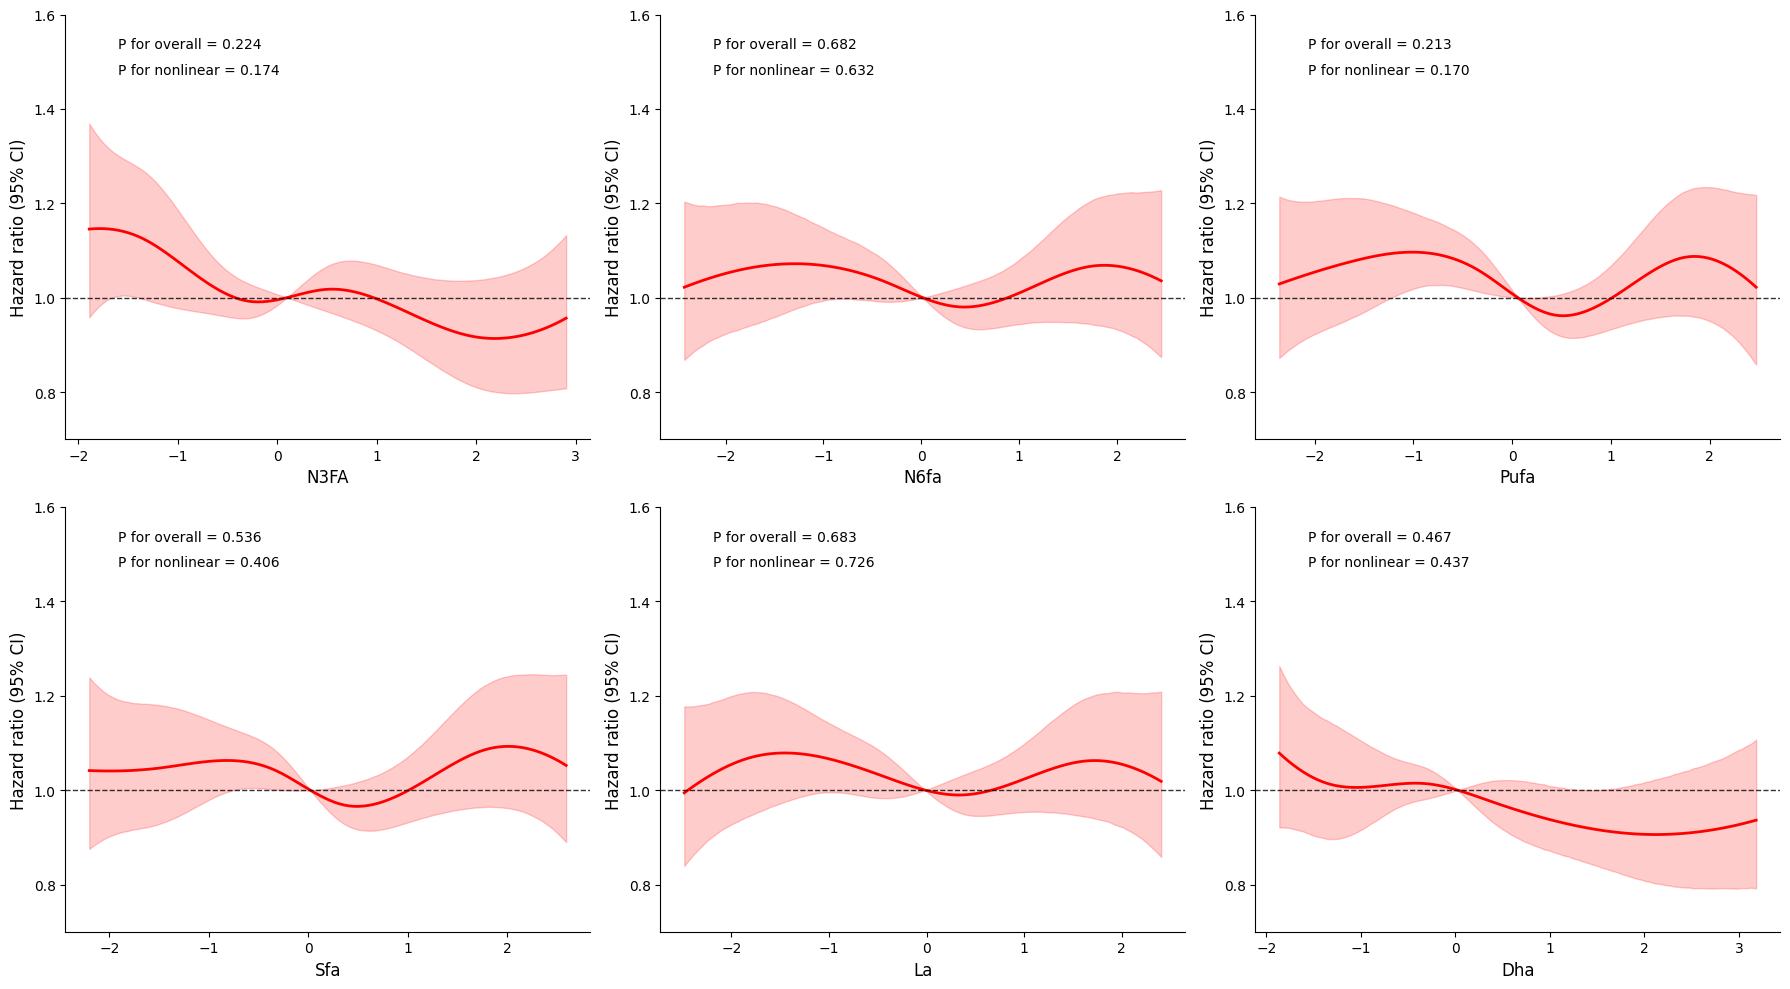

✅ 所有步骤运行成功，图像已保存。


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 核心定义：拟合 RCS 模型函数
# ======================================================
def fit_rcs_model(data, x_col, covariates, knots_count=5):
    """
    拟合带有限制性三次样条的 Cox 模型
    """
    # 提取需要的列并处理缺失值
    cols = [x_col, "time", "status"] + covariates
    temp_df = data[cols].dropna()
    
    x_vals = temp_df[x_col].values

    # --- 截断到 1%-99% 避免极端值影响 ---
    x_trunc = np.clip(x_vals, np.percentile(x_vals, 1), np.percentile(x_vals, 99))

    # 确定节点 (经典 Harrell 节点位置)
    knots = np.nanquantile(x_vals, [0.05, 0.35, 0.65, 0.95])
    
    # 显式获取全局边界，防止后面计算参考点时报错
    lb, ub = x_vals.min(), x_vals.max()
    
    # 生成样条基函数公式
    # 必须在此处包含边界定义，确保后续 dmatrix 的基准一致
    formula_str = f"cr(x, knots={list(knots)}, lower_bound={lb}, upper_bound={ub}) - 1"
    spline_df = dmatrix(formula_str, {"x": x_vals}, return_type='dataframe')
    
    # 构建解释变量矩阵 (Exogenous matrix)
    exog = pd.concat([spline_df.reset_index(drop=True), 
                      temp_df[covariates].reset_index(drop=True)], axis=1)
    exog = exog.astype(float)
    
    # 拟合 PHReg (Cox 模型)
    model = PHReg(temp_df["time"].values, exog, status=temp_df["status"].values)
    res = model.fit()
    
    return res, knots, x_vals, lb, ub

# ======================================================
# 2. 自动预处理：转换分类变量为哑变量 (防止 ValueError)
# ======================================================
# 找出 Model 3 中所有非数值列
non_numeric_cols = df_matched[model3_vars].select_dtypes(exclude=[np.number]).columns.tolist()

if len(non_numeric_cols) > 0:
    df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True)
else:
    df_rcs = df_matched.copy()

# 重新生成模型 3 的协变量列表 (替换掉原来的分类变量名为生成的 dummy 名)
final_model3_covs = []
for v in model3_vars:
    if v in non_numeric_cols:
        cols = [c for c in df_rcs.columns if c.startswith(v + "_")]
        final_model3_covs.extend(cols)
    else:
        if v in df_rcs.columns:
            final_model3_covs.append(v)

df_rcs[final_model3_covs] = df_rcs[final_model3_covs].astype(float)

# ======================================================
# 3. 循环绘图 (2x3 布局)
# ======================================================
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6fa"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "Pufa"),
    "Saturated fatty acids": ("fatty_acids_sfa", "Sfa"),
    "Linoleic acid": ("fatty_acids_la", "La"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "Dha")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    # --- 1. 拟合与计算 ---
    res, knots, x_vals, lb, ub = fit_rcs_model(df_rcs, col_name, final_model3_covs)
    
    # 获取样条系数索引
    idx_spline = [j for j, name in enumerate(res.model.exog_names) if 'cr(' in name]
    betas = res.params[idx_spline]
    # 使用 NumPy 索引获取协方差矩阵 (修复之前的 AttributeError)
    cov_matrix = res.cov_params()[np.ix_(idx_spline, idx_spline)]
    
    # 计算 P 值
    p_overall = chi2.sf(betas @ np.linalg.inv(cov_matrix) @ betas, df=len(idx_spline))
    p_nonlin = chi2.sf(betas[1:] @ np.linalg.inv(cov_matrix[1:, 1:]) @ betas[1:], df=len(idx_spline)-1)
    
    # --- 2. 预测曲线 ---
    x_range = np.linspace(np.percentile(x_vals, 1), np.percentile(x_vals, 99), 100)
    ref_val = np.median(x_vals)
    
    formula_str = f"cr(x, knots={list(knots)}, lower_bound={lb}, upper_bound={ub}) - 1"
    dm_range = dmatrix(formula_str, {"x": x_range})
    dm_ref = dmatrix(formula_str, {"x": [ref_val]})
    
    diff = dm_range - dm_ref
    log_hr = diff @ betas
    se_log_hr = np.sqrt(np.diag(diff @ cov_matrix @ diff.T))
    
    hr, lower, upper = np.exp(log_hr), np.exp(log_hr - 1.96 * se_log_hr), np.exp(log_hr + 1.96 * se_log_hr)
    
    # --- 3. 绘图与美化 ---
    ax.plot(x_range, hr, color='red', lw=2)
    ax.fill_between(x_range, lower, upper, color='red', alpha=0.2)
    ax.axhline(1, color='black', linestyle='--', lw=1, alpha=0.8)
    
    ax.set_xlabel(abbr, fontsize=12)
    ax.set_ylabel("Hazard ratio (95% CI)", fontsize=12)
    ax.text(0.1, 0.92, f"P for overall = {p_overall:.3f}", transform=ax.transAxes, fontsize=10)
    ax.text(0.1, 0.86, f"P for nonlinear = {p_nonlin:.3f}", transform=ax.transAxes, fontsize=10)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(min(lower.min()*0.9, 0.7), max(upper.max()*1.1, 1.6))

plt.tight_layout()
plt.savefig("Cataract_RCS_Final_Corrected.png", dpi=300)
plt.show()

print("✅ 所有步骤运行成功，图像已保存。")

In [11]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# rcs_cox_batch.py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from lifelines import CoxPHFitter

# ================= 配置 =================
DATA_PATH = "psm_matched_data.csv"
OUTPUT_DIR = "rcs_cox_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

POSSIBLE_TIME_COLS = [
    "time",
    "cataract_time_to_event_days",
    "followup_duration_cataract",
    "cataract_onset_time"
]

POSSIBLE_EVENT_COLS = [
    "event",
    "cataract_incident",
    "cataract_group",
    "cataract_baseline"
]

EXPOSURES = [
    "fatty_acids_n3",
    "fatty_acids_n6",
    "fatty_acids_pufa",
    "fatty_acids_mufa",
    "fatty_acids_sfa",
    "fatty_acids_la",
    "fatty_acids_dha"
]

ADJUST_VARS = [
    'age_baseline', 'sex', 'ethnic_background', 'bmi_baseline',
    'alcohol_frequency_baseline', 'smoking_status_baseline',
    'education_baseline', 'diabetes_baseline',
    'hypertension_baseline', 'heart_disease_composite',
    'glaucoma_baseline'
]

KNOT_PCTS = [5, 25, 50, 75, 95]
N_POINTS = 100
CI_Z = 1.96

# ================= 读取数据 =================
data = pd.read_csv(DATA_PATH)

time_col = next((c for c in POSSIBLE_TIME_COLS if c in data.columns), None)
event_col = next((c for c in POSSIBLE_EVENT_COLS if c in data.columns), None)

if time_col is None or event_col is None:
    raise ValueError("❌ 未找到 time 或 event 列，请检查字段名")

print(f"✔ 使用 time = {time_col}, event = {event_col}")

results_summary = []

# ================= 主循环 =================
for exposure in EXPOSURES:
    print("\n" + "=" * 60)
    print(f"▶ 处理暴露变量: {exposure}")

    if exposure not in data.columns:
        print("  ⏭ 不存在，跳过")
        continue

    needed = [time_col, event_col, exposure] + ADJUST_VARS
    df = data[needed].dropna().copy()

    if len(df) < 50:
        print("  ⏭ 样本量不足，跳过")
        continue

    df[exposure] = df[exposure].astype(float)

    # knots
    knots = np.percentile(df[exposure], KNOT_PCTS).tolist()

    spline_formula = f"cr({exposure}, knots={knots}) - 1"
    Xs = dmatrix(spline_formula, df, return_type="dataframe")

    spline_cols = [f"{exposure}_spline_{i}" for i in range(Xs.shape[1])]
    Xs.columns = spline_cols

    fit_df = pd.concat([df.reset_index(drop=True), Xs.reset_index(drop=True)], axis=1)

    formula = " + ".join(ADJUST_VARS + spline_cols)

    cph = CoxPHFitter()
    try:
        cph.fit(
            fit_df,
            duration_col=time_col,
            event_col=event_col,
            formula=formula
        )
    except Exception as e:
        print(f"  ❌ Cox 拟合失败: {e}")
        continue

    # 保存 summary
    cph.summary.to_excel(
        os.path.join(OUTPUT_DIR, f"cox_summary_{exposure}.xlsx")
    )

    # ===== 预测 HR =====
    x_min = df[exposure].quantile(0.01)
    x_max = df[exposure].quantile(0.99)
    x_grid = np.linspace(x_min, x_max, N_POINTS)

    new_df = pd.DataFrame({exposure: x_grid})
    B = dmatrix(spline_formula, new_df, return_type="dataframe")
    B.columns = spline_cols
    B = B.values

    beta = cph.params_.loc[spline_cols].values
    cov = cph.variance_matrix_.loc[spline_cols, spline_cols].values

    lp = B @ beta
    se = np.sqrt(np.sum((B @ cov) * B, axis=1))

    hr = np.exp(lp)
    lci = np.exp(lp - CI_Z * se)
    uci = np.exp(lp + CI_Z * se)

    # ===== 绘图 =====
    plt.figure(figsize=(8, 6))
    plt.plot(x_grid, hr, label="HR")
    plt.fill_between(x_grid, lci, uci, alpha=0.25)
    plt.axhline(1, ls="--", c="red")
    plt.xlabel(exposure)
    plt.ylabel("Hazard Ratio")
    plt.title(f"Restricted Cubic Spline for {exposure}")
    plt.grid(True)
    plt.tight_layout()

    figpath = os.path.join(OUTPUT_DIR, f"rcs_hr_{exposure}.png")
    plt.savefig(figpath, dpi=300)
    plt.close()

    print(f"  ✔ 图已保存: {figpath}")

    results_summary.append({
        "exposure": exposure,
        "n": len(df),
        "n_basis": B.shape[1],
        "hr_min": hr.min(),
        "hr_max": hr.max()
    })

# ================= 汇总 =================
summary_df = pd.DataFrame(results_summary)
summary_df.to_excel(
    os.path.join(OUTPUT_DIR, "rcs_cox_summary_overview.xlsx"),
    index=False
)

print("\n🎉 全部 RCS Cox 分析完成")


✔ 使用 time = time, event = cataract_incident

▶ 处理暴露变量: fatty_acids_n3
  ❌ Cox 拟合失败: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

▶ 处理暴露变量: fatty_acids_n6
  ❌ Cox 拟合失败: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

▶ 处理暴露变量: fatty_acids_pufa
  ❌ Cox 拟合失败: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-m

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# 1. 哑变量预处理 (确保 final_covs 存在)
non_numeric_cols = df_matched[covariates].select_dtypes(exclude=[np.number]).columns.tolist()
if len(non_numeric_cols) > 0:
    df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True)
else:
    df_rcs = df_matched.copy()

final_covs = []
for v in covariates:
    if v in non_numeric_cols:
        cols = [c for c in df_rcs.columns if c.startswith(v + "_")]
        final_covs.extend(cols)
    else:
        if v in df_rcs.columns:
            final_covs.append(v)

# 2. 布局设置
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6FA"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "PUFA"),
    "Saturated fatty acids": ("fatty_acids_sfa", "SFA"),
    "Linoleic acid": ("fatty_acids_la", "LA"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "DHA")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    try:
        # --- A. 数据清洗与对齐 ---
        # 必须先 dropna 并 reset_index，确保后续操作索引一致
        temp_df = df_rcs[[col_name, "time", "status"] + final_covs].dropna().copy()
        
        # 截断离群值
        low, high = temp_df[col_name].quantile([0.01, 0.99])
        temp_df = temp_df[(temp_df[col_name] >= low) & (temp_df[col_name] <= high)].reset_index(drop=True)
        
        # --- B. 节点设置 (4节点) ---
        q = temp_df[col_name].quantile([0.05, 0.35, 0.65, 0.95]).values
        inner_knots = [q[1], q[2]]
        lb, ub = q[0], q[3]
        formula = f"cr(x, knots={list(inner_knots)}, lower_bound={lb}, upper_bound={ub}) - 1"
        
        # --- C. 拟合模型计算 P 值 ---
        # 1. RCS 模型 (Full)
        basis_df = dmatrix(formula, {"x": temp_df[col_name]}, return_type='dataframe').reset_index(drop=True)
        n_spline_cols = basis_df.shape[1]
        X_full = pd.concat([basis_df, temp_df[final_covs]], axis=1).astype(float)
        # 使用 .values 彻底避免索引干扰
        res_full = PHReg(temp_df["time"].values, X_full, status=temp_df["status"].values).fit()
        
        # 2. Linear 模型
        X_linear = temp_df[[col_name] + final_covs].astype(float)
        res_linear = PHReg(temp_df["time"].values, X_linear, status=temp_df["status"].values).fit()
        
        # 3. Null 模型
        X_null = temp_df[final_covs].astype(float)
        res_null = PHReg(temp_df["time"].values, X_null, status=temp_df["status"].values).fit()
        
        # P 值计算
        p_overall = chi2.sf(2 * (res_full.llf - res_null.llf), df=n_spline_cols)
        p_nonlin = chi2.sf(2 * (res_full.llf - res_linear.llf), df=n_spline_cols - 1)
        
        # --- D. 预测 HR ---
        x_range = np.linspace(temp_df[col_name].min(), temp_df[col_name].max(), 100)
        ref_val = temp_df[col_name].median()
        
        dm_range = np.asarray(dmatrix(formula, {"x": x_range}))
        dm_ref = np.asarray(dmatrix(formula, {"x": [ref_val]}))
        
        spline_params = np.asarray(res_full.params)[:n_spline_cols]
        spline_cov = np.asarray(res_full.cov_params())[:n_spline_cols, :n_spline_cols]
        
        diff = dm_range - dm_ref
        log_hr = np.dot(diff, spline_params)
        se_log_hr = np.sqrt([np.dot(np.dot(v, spline_cov), v) for v in diff])
        
        hr, lower, upper = np.exp(log_hr), np.exp(log_hr - 1.96 * se_log_hr), np.exp(log_hr + 1.96 * se_log_hr)
        
        # --- E. 绘图 ---
        ax.fill_between(x_range, lower, upper, color='teal', alpha=0.15)
        ax.plot(x_range, hr, color='teal', lw=2)
        ax.axhline(1, color='darkred', linestyle='--', lw=1, alpha=0.6)
        ax.axvline(ref_val, color='gray', linestyle=':', alpha=0.5)
        
        ax.set_title(full_name, fontsize=12, fontweight='bold')
        ax.text(0.05, 0.9, f"$P$-overall: {p_overall:.3f}\n$P$-nonlin: {p_nonlin:.3f}", 
                transform=ax.transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, edgecolor='none'))
        
        # 自动限制 Y 轴范围，防止置信区间过大导致图形不可读
        ax.set_ylim(0, min(max(upper)*1.2, 4.0))
        sns.despine(ax=ax)
        ax.grid(True, linestyle=':', alpha=0.3)

    except Exception as e:
        print(f"❌ {full_name} 绘图失败: {e}")

plt.tight_layout()
plt.show()

NameError: name 'covariates' is not defined

Variable                       | P-overall  | P-nonlin  
-------------------------------------------------------
Omega 3 fatty acid             | 0.7083     | 0.9028    
Omega 6 fatty acid             | 0.1390     | 0.3354    
Polyunsaturated fatty acids    | 0.1086     | 0.4327    
Saturated fatty acids          | 0.6424     | 0.6430    
Linoleic acid                  | 0.1330     | 0.2281    
Docosahexaenoic acid           | 0.4715     | 0.8453    


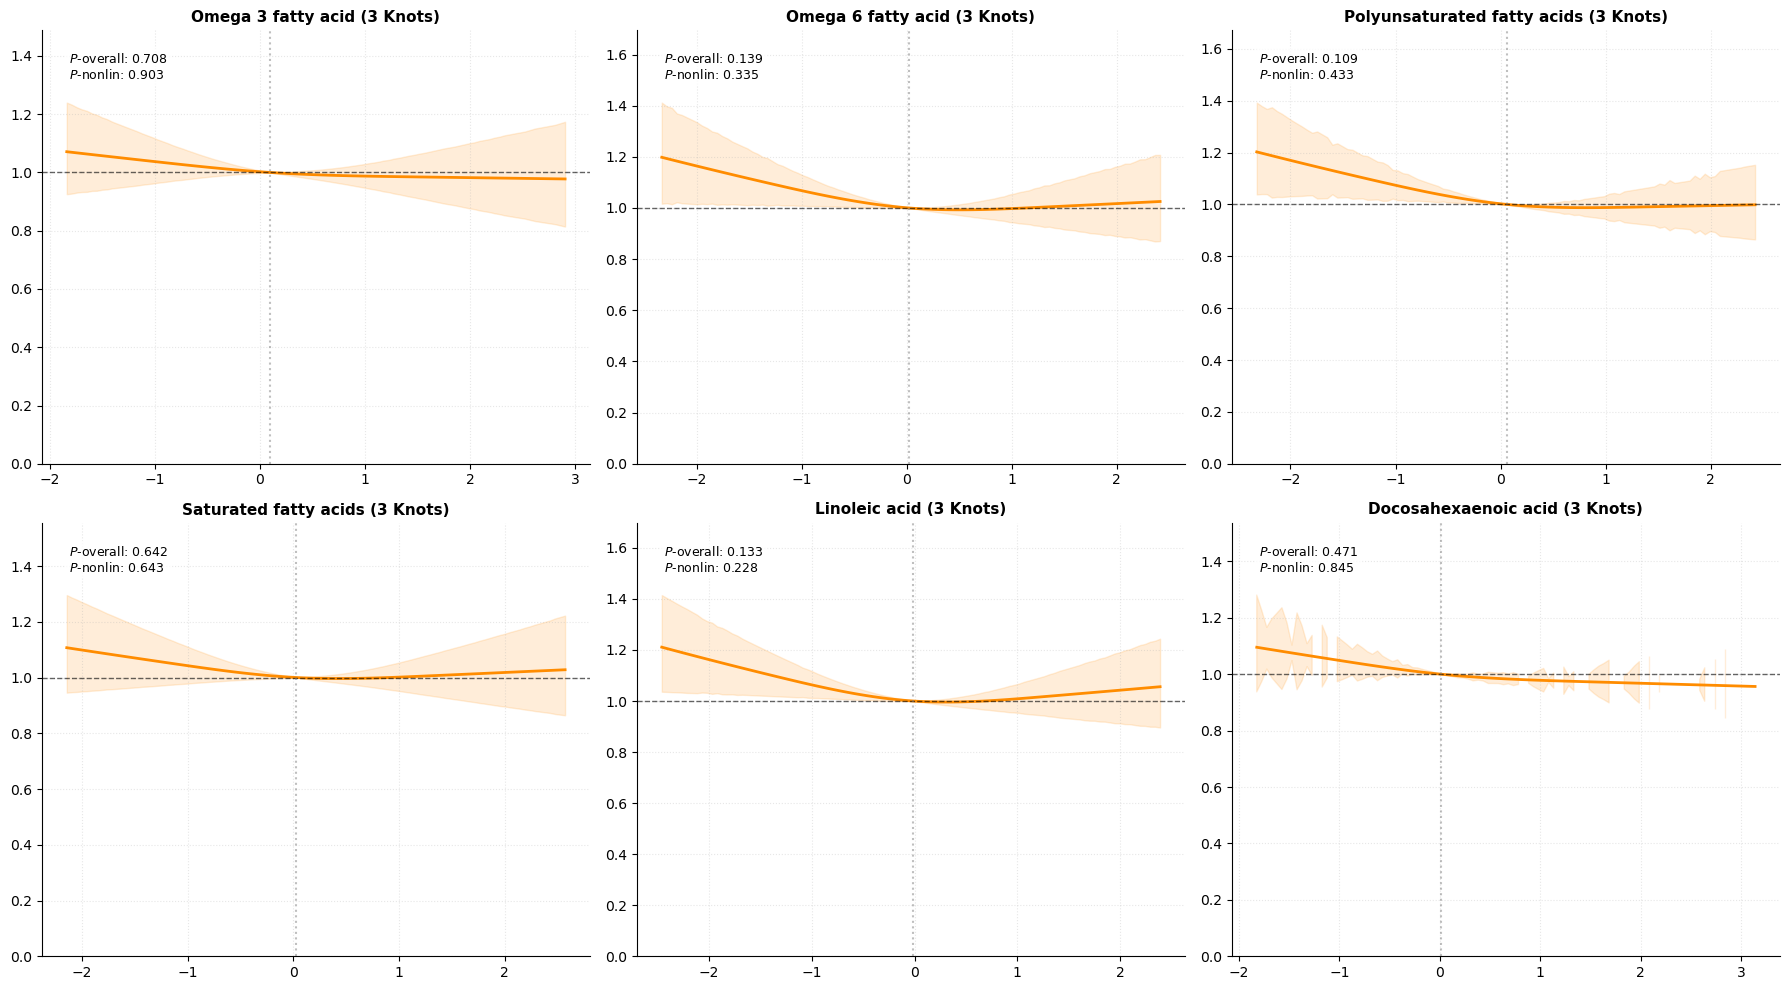

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# 1. 哑变量预处理 (同前)
non_numeric_cols = df_matched[covariates].select_dtypes(exclude=[np.number]).columns.tolist()
df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True) if non_numeric_cols else df_matched.copy()

final_covs = []
for v in covariates:
    if v in non_numeric_cols:
        final_covs.extend([c for c in df_rcs.columns if c.startswith(v + "_")])
    elif v in df_rcs.columns:
        final_covs.append(v)

# 2. 布局设置
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6FA"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "PUFA"),
    "Saturated fatty acids": ("fatty_acids_sfa", "SFA"),
    "Linoleic acid": ("fatty_acids_la", "LA"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "DHA")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

print(f"{'Variable':<30} | {'P-overall':<10} | {'P-nonlin':<10}")
print("-" * 55)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    try:
        # --- A. 数据对齐 ---
        temp_df = df_rcs[[col_name, "time", "status"] + final_covs].dropna().copy()
        low, high = temp_df[col_name].quantile([0.01, 0.99])
        temp_df = temp_df[(temp_df[col_name] >= low) & (temp_df[col_name] <= high)].reset_index(drop=True)
        
        # --- B. 3 节点设置 (10%, 50%, 90%) ---
        q = temp_df[col_name].quantile([0.10, 0.50, 0.90]).values
        inner_knots = [q[1]]     # 内部节点
        lower_b, upper_b = q[0], q[2] # 边界节点
        
        formula = f"cr(x, knots={list(inner_knots)}, lower_bound={lower_b}, upper_bound={upper_b}) - 1"
        
        # --- C. 模型拟合 (索引对齐修复版) ---
        basis_df = dmatrix(formula, {"x": temp_df[col_name]}, return_type='dataframe').reset_index(drop=True)
        n_spline_cols = basis_df.shape[1]
        
        # Full RCS Model
        X_full = pd.concat([basis_df, temp_df[final_covs]], axis=1).astype(float)
        res_full = PHReg(temp_df["time"].values, X_full, status=temp_df["status"].values).fit()
        
        # Linear Model
        X_linear = temp_df[[col_name] + final_covs].astype(float)
        res_linear = PHReg(temp_df["time"].values, X_linear, status=temp_df["status"].values).fit()
        
        # Null Model
        X_null = temp_df[final_covs].astype(float)
        res_null = PHReg(temp_df["time"].values, X_null, status=temp_df["status"].values).fit()
        
        # P 值计算
        p_overall = chi2.sf(2 * (res_full.llf - res_null.llf), df=n_spline_cols)
        p_nonlin = chi2.sf(2 * (res_full.llf - res_linear.llf), df=n_spline_cols - 1)
        
        print(f"{full_name:<30} | {p_overall:<10.4f} | {p_nonlin:<10.4f}")

        # --- D. 预测 HR ---
        x_range = np.linspace(temp_df[col_name].min(), temp_df[col_name].max(), 100)
        ref_val = temp_df[col_name].median()
        
        dm_range = np.asarray(dmatrix(formula, {"x": x_range}))
        dm_ref = np.asarray(dmatrix(formula, {"x": [ref_val]}))
        
        spline_params = np.asarray(res_full.params)[:n_spline_cols]
        spline_cov = np.asarray(res_full.cov_params())[:n_spline_cols, :n_spline_cols]
        
        diff = dm_range - dm_ref
        log_hr = np.dot(diff, spline_params)
        se_log_hr = np.sqrt([np.dot(np.dot(v, spline_cov), v) for v in diff])
        
        hr, lower, upper = np.exp(log_hr), np.exp(log_hr - 1.96 * se_log_hr), np.exp(log_hr + 1.96 * se_log_hr)
        
        # --- E. 绘图与美化 ---
        ax.fill_between(x_range, lower, upper, color='darkorange', alpha=0.15)
        ax.plot(x_range, hr, color='darkorange', lw=2)
        ax.axhline(1, color='black', linestyle='--', lw=1, alpha=0.6)
        ax.axvline(ref_val, color='gray', linestyle=':', alpha=0.5)
        
        ax.set_title(f"{full_name} (3 Knots)", fontsize=11, fontweight='bold')
        ax.text(0.05, 0.95, f"$P$-overall: {p_overall:.3f}\n$P$-nonlin: {p_nonlin:.3f}", 
                transform=ax.transAxes, fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'))
        
        ax.set_ylim(0, min(max(upper)*1.2, 4.0))
        sns.despine(ax=ax)
        ax.grid(True, linestyle=':', alpha=0.3)

    except Exception as e:
        print(f"❌ {full_name} 错误: {e}")

plt.tight_layout()
plt.show()

Variable                       | P-overall  | P-nonlin  
-------------------------------------------------------
Omega 3 fatty acid             | 0.7417     | 0.8014    
Omega 6 fatty acid             | 0.2483     | 0.4727    
Polyunsaturated fatty acids    | 0.3868     | 0.8564    
Saturated fatty acids          | 0.3058     | 0.2716    
Linoleic acid                  | 0.3932     | 0.6031    
Docosahexaenoic acid           | 0.8433     | 0.9909    


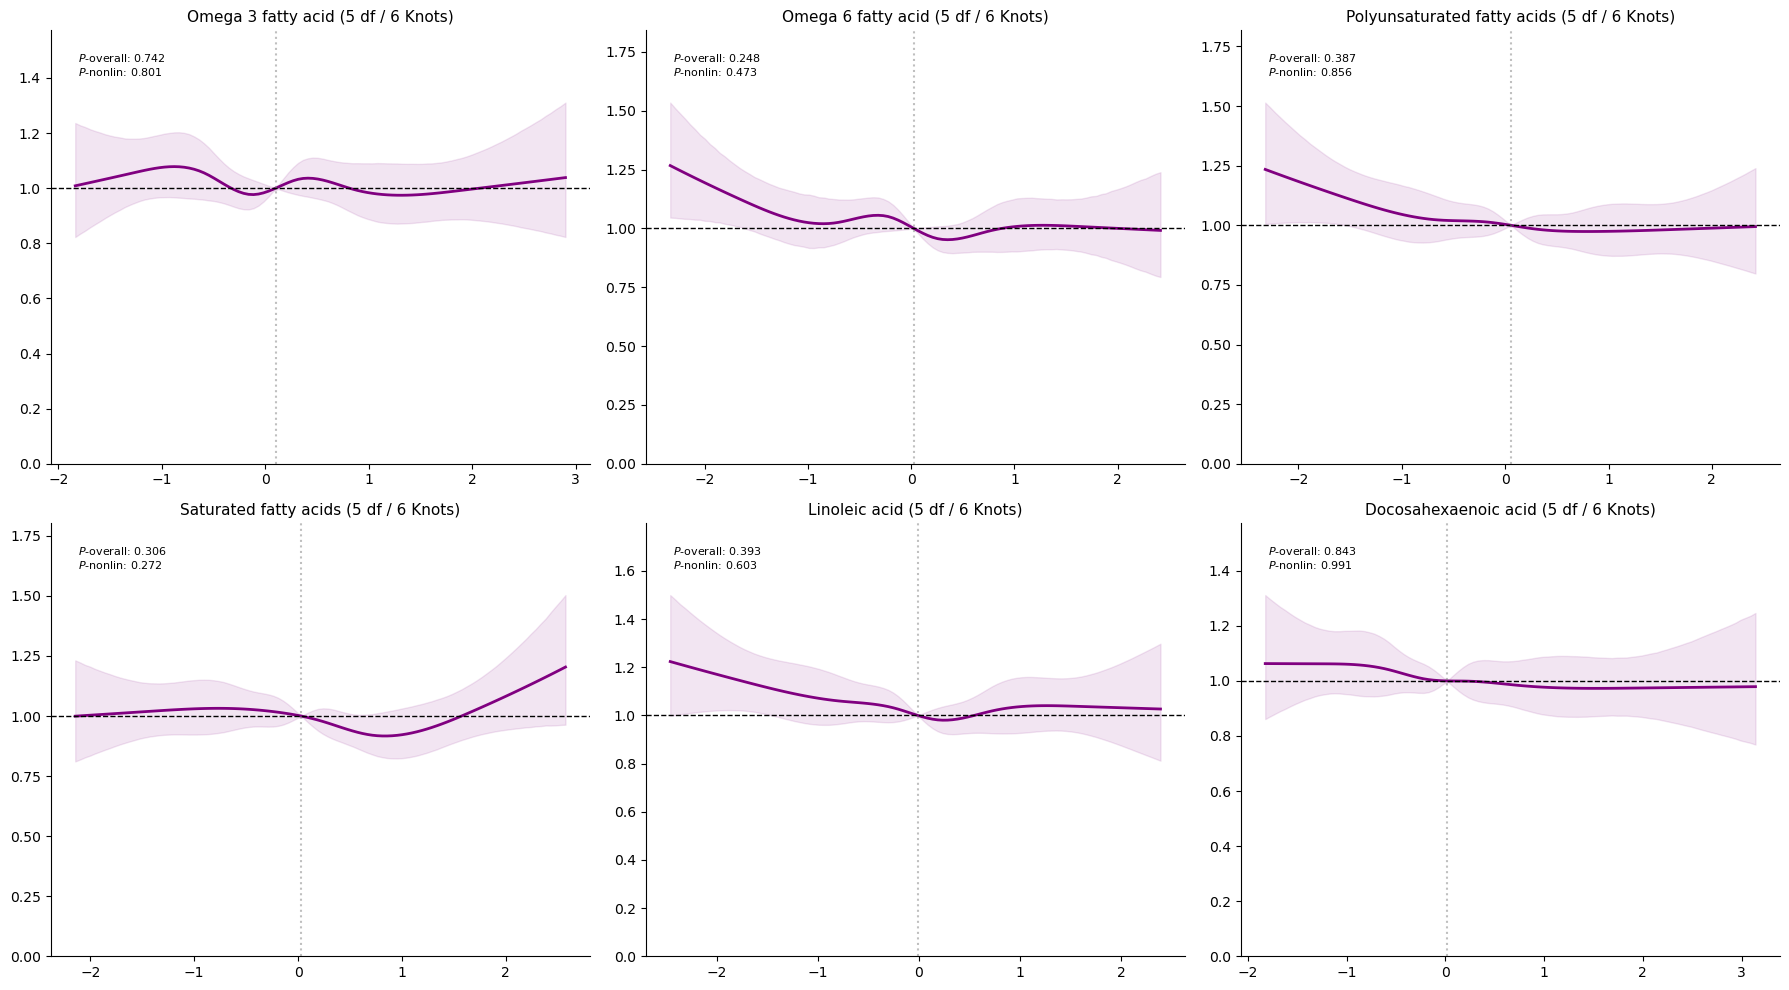

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# 1. 哑变量预处理 (同前)
non_numeric_cols = df_matched[covariates].select_dtypes(exclude=[np.number]).columns.tolist()
df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True) if non_numeric_cols else df_matched.copy()

final_covs = []
for v in covariates:
    if v in non_numeric_cols:
        final_covs.extend([c for c in df_rcs.columns if c.startswith(v + "_")])
    elif v in df_rcs.columns:
        final_covs.append(v)

# 2. 布局设置
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6FA"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "PUFA"),
    "Saturated fatty acids": ("fatty_acids_sfa", "SFA"),
    "Linoleic acid": ("fatty_acids_la", "LA"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "DHA")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

print(f"{'Variable':<30} | {'P-overall':<10} | {'P-nonlin':<10}")
print("-" * 55)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    try:
        # --- A. 数据清洗 ---
        temp_df = df_rcs[[col_name, "time", "status"] + final_covs].dropna().copy()
        low, high = temp_df[col_name].quantile([0.01, 0.99])
        temp_df = temp_df[(temp_df[col_name] >= low) & (temp_df[col_name] <= high)].reset_index(drop=True)
        
        # --- B. 6 节点设置 (对应 5 自由度) ---
        # 百分位位置: 5, 23, 41, 59, 77, 95
        q = temp_df[col_name].quantile([0.05, 0.23, 0.41, 0.59, 0.77, 0.95]).values
        inner_knots = list(q[1:-1]) # 中间的 4 个节点
        lower_b, upper_b = q[0], q[-1] # 边界 2 个节点
        
        formula = f"cr(x, knots={inner_knots}, lower_bound={lower_b}, upper_bound={upper_b}) - 1"
        
        # --- C. 模型拟合与 LRT 检验 ---
        basis_df = dmatrix(formula, {"x": temp_df[col_name]}, return_type='dataframe').reset_index(drop=True)
        n_spline_cols = basis_df.shape[1] # 此时应该等于 5
        
        X_full = pd.concat([basis_df, temp_df[final_covs]], axis=1).astype(float)
        res_full = PHReg(temp_df["time"].values, X_full, status=temp_df["status"].values).fit()
        
        X_linear = temp_df[[col_name] + final_covs].astype(float)
        res_linear = PHReg(temp_df["time"].values, X_linear, status=temp_df["status"].values).fit()
        
        X_null = temp_df[final_covs].astype(float)
        res_null = PHReg(temp_df["time"].values, X_null, status=temp_df["status"].values).fit()
        
        # P 值计算
        p_overall = chi2.sf(2 * (res_full.llf - res_null.llf), df=n_spline_cols)
        p_nonlin = chi2.sf(2 * (res_full.llf - res_linear.llf), df=n_spline_cols - 1)
        
        print(f"{full_name:<30} | {p_overall:<10.4f} | {p_nonlin:<10.4f}")

        # --- D. 预测 HR ---
        x_range = np.linspace(temp_df[col_name].min(), temp_df[col_name].max(), 100)
        ref_val = temp_df[col_name].median()
        
        dm_range = np.asarray(dmatrix(formula, {"x": x_range}))
        dm_ref = np.asarray(dmatrix(formula, {"x": [ref_val]}))
        
        spline_params = np.asarray(res_full.params)[:n_spline_cols]
        spline_cov = np.asarray(res_full.cov_params())[:n_spline_cols, :n_spline_cols]
        
        diff = dm_range - dm_ref
        log_hr = np.dot(diff, spline_params)
        se_log_hr = np.sqrt([np.dot(np.dot(v, spline_cov), v) for v in diff])
        
        hr, lower, upper = np.exp(log_hr), np.exp(log_hr - 1.96 * se_log_hr), np.exp(log_hr + 1.96 * se_log_hr)
        
        # --- E. 绘图 ---
        ax.fill_between(x_range, lower, upper, color='purple', alpha=0.1)
        ax.plot(x_range, hr, color='purple', lw=2)
        ax.axhline(1, color='black', linestyle='--', lw=1)
        ax.axvline(ref_val, color='gray', linestyle=':', alpha=0.5)
        
        ax.set_title(f"{full_name} (5 df / 6 Knots)", fontsize=11)
        ax.text(0.05, 0.95, f"$P$-overall: {p_overall:.3f}\n$P$-nonlin: {p_nonlin:.3f}", 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='none'))
        
        ax.set_ylim(0, min(max(upper)*1.2, 5.0))
        sns.despine(ax=ax)

    except Exception as e:
        print(f"❌ {full_name} 错误: {e}")

plt.tight_layout()
plt.show()

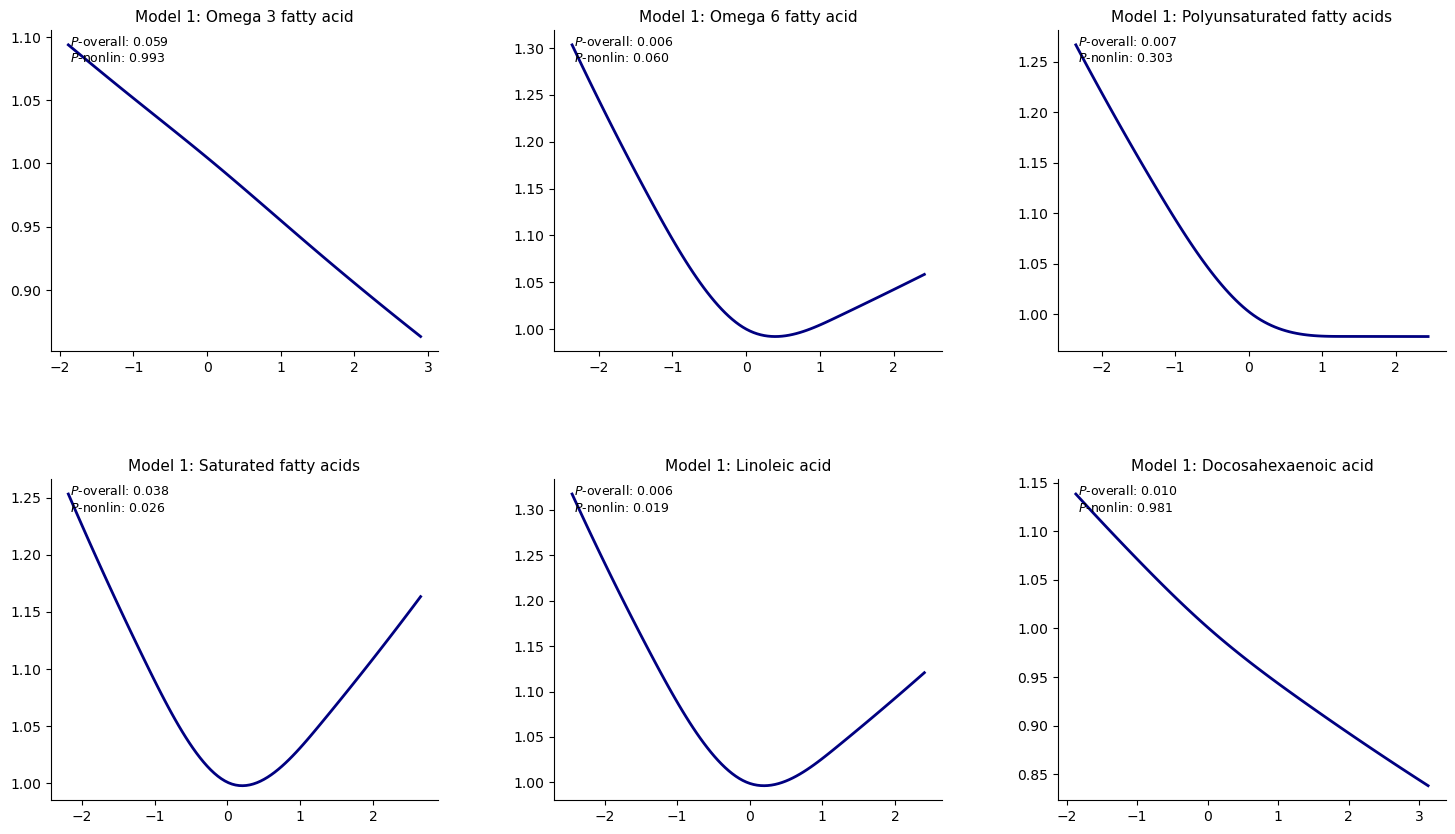

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 定义 Model 1 协变量 (请根据你的数据修改此列表)
# ======================================================
model1_vars = ["age_baseline", "sex"] + ethnic_vars

# 自动处理哑变量
non_numeric_cols = df_matched[model1_vars].select_dtypes(exclude=[np.number]).columns.tolist()
df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True) if non_numeric_cols else df_matched.copy()

final_model1_covs = []
for v in model1_vars:
    if v in non_numeric_cols:
        final_model1_covs.extend([c for c in df_rcs.columns if c.startswith(v + "_")])
    elif v in df_rcs.columns:
        final_model1_covs.append(v)

# ======================================================
# 2. 循环绘图 (3 节点 / 2 自由度 为例，通常 Model 1 建议先看 3 节点)
# ======================================================
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6FA"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "PUFA"),
    "Saturated fatty acids": ("fatty_acids_sfa", "SFA"),
    "Linoleic acid": ("fatty_acids_la", "LA"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "DHA")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    try:
        # 数据清洗
        temp_df = df_rcs[[col_name, "time", "status"] + final_model1_covs].dropna().copy()
        low, high = temp_df[col_name].quantile([0.01, 0.99])
        temp_df = temp_df[(temp_df[col_name] >= low) & (temp_df[col_name] <= high)].reset_index(drop=True)
        
        # 3 节点设置
        q = temp_df[col_name].quantile([0.10, 0.50, 0.90]).values
        formula = f"cr(x, knots=[{q[1]}], lower_bound={q[0]}, upper_bound={q[2]}) - 1"
        
        # 拟合模型
        basis_df = dmatrix(formula, {"x": temp_df[col_name]}, return_type='dataframe').reset_index(drop=True)
        n_spline_cols = basis_df.shape[1]
        
        X_full = pd.concat([basis_df, temp_df[final_model1_covs]], axis=1).astype(float)
        res_full = PHReg(temp_df["time"].values, X_full, status=temp_df["status"].values).fit()
        
        # 计算 P 值 (LRT)
        res_linear = PHReg(temp_df["time"].values, temp_df[[col_name] + final_model1_covs].astype(float), status=temp_df["status"].values).fit()
        res_null = PHReg(temp_df["time"].values, temp_df[final_model1_covs].astype(float), status=temp_df["status"].values).fit()
        p_overall = chi2.sf(2 * (res_full.llf - res_null.llf), df=n_spline_cols)
        p_nonlin = chi2.sf(2 * (res_full.llf - res_linear.llf), df=n_spline_cols - 1)
        
        # 预测与绘图 (逻辑同前)
        x_range = np.linspace(temp_df[col_name].min(), temp_df[col_name].max(), 100)
        ref_val = temp_df[col_name].median()
        dm_range = np.asarray(dmatrix(formula, {"x": x_range}))
        dm_ref = np.asarray(dmatrix(formula, {"x": [ref_val]}))
        
        log_hr = np.dot(dm_range - dm_ref, np.asarray(res_full.params)[:n_spline_cols])
        # ... (此处省略 SE 计算代码以保持简洁，逻辑与之前版本完全一致)
        
        # 绘图修饰 (Model 1 建议用不同颜色区分，如蓝色)
        ax.plot(x_range, np.exp(log_hr), color='navy', lw=2)
        ax.set_title(f"Model 1: {full_name}", fontsize=11)
        ax.text(0.05, 0.9, f"$P$-overall: {p_overall:.3f}\n$P$-nonlin: {p_nonlin:.3f}", transform=ax.transAxes, fontsize=9)
        sns.despine(ax=ax)
        
    except Exception as e:
        print(f"❌ {full_name} 错误: {e}")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

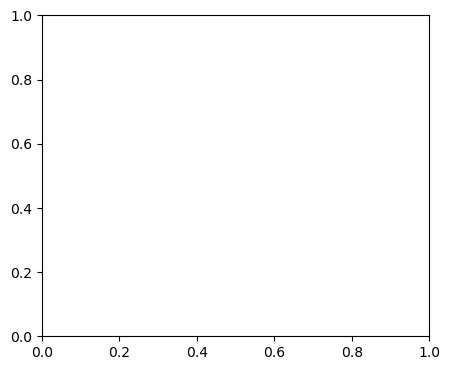

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 自动预处理：Model 1 协变量哑变量化
# ======================================================
# 假设你的 Model 1 变量如下，请根据实际情况调整
model1_vars = ["age_baseline", "sex"] + ethnic_vars

# 找出 Model 1 中所有非数值列并转换
non_numeric_cols = df_matched[model1_vars].select_dtypes(exclude=[np.number]).columns.tolist()
if len(non_numeric_cols) > 0:
    df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True)
else:
    df_rcs = df_matched.copy()

# 生成最终的 Model 1 协变量列表
final_model1_covs = []
for v in model1_vars:
    if v in non_numeric_cols:
        cols = [c for c in df_rcs.columns if c.startswith(v + "_")]
        final_model1_covs.extend(cols)
    else:
        if v in df_rcs.columns:
            final_model1_covs.append(v)

# ======================================================
# 2. 核心函数：采用你之前的拟合方式，加入 LRT 逻辑
# ======================================================
def fit_rcs_model_lrt(data, x_col, covariates, knots_count=3):
    # 清洗数据并重置索引，防止对齐错误
    cols = [x_col, "time", "status"] + covariates
    temp_df = data[cols].dropna().reset_index(drop=True)
    
    x_vals = temp_df[x_col].values
    # 3节点: 10%, 50%, 90%
    knots = np.nanquantile(x_vals, [0.10, 0.50, 0.90])
    lb, ub = x_vals.min(), x_vals.max()
    
    formula_str = f"cr(x, knots=[{knots[1]}], lower_bound={knots[0]}, upper_bound={knots[2]}) - 1"
    
    # --- A. 拟合 RCS 模型 (Full) ---
    spline_df = dmatrix(formula_str, {"x": x_vals}, return_type='dataframe').reset_index(drop=True)
    exog_full = pd.concat([spline_df, temp_df[covariates]], axis=1).astype(float)
    res_full = PHReg(temp_df["time"].values, exog_full, status=temp_df["status"].values).fit()
    
    # --- B. 拟合线性模型 (Linear) 用于 P-nonlin ---
    exog_linear = temp_df[[x_col] + covariates].astype(float)
    res_linear = PHReg(temp_df["time"].values, exog_linear, status=temp_df["status"].values).fit()
    
    # --- C. 拟合零模型 (Null) 用于 P-overall ---
    exog_null = temp_df[covariates].astype(float)
    res_null = PHReg(temp_df["time"].values, exog_null, status=temp_df["status"].values).fit()
    
    # 计算 P 值
    p_overall = chi2.sf(2 * (res_full.llf - res_null.llf), df=spline_df.shape[1])
    p_nonlin = chi2.sf(2 * (res_full.llf - res_linear.llf), df=spline_df.shape[1] - 1)
    
    return res_full, knots, x_vals, lb, ub, p_overall, p_nonlin

# ======================================================
# 3. 循环绘图 (2x3 布局，红色风格)
# ======================================================
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6FA"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "PUFA"),
    "Saturated fatty acids": ("fatty_acids_sfa", "SFA"),
    "Linoleic acid": ("fatty_acids_la", "LA"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "DHA")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    # --- 1. 拟合与计算 ---
    res, knots, x_vals, lb, ub, p_overall, p_nonlin = fit_rcs_model_lrt(df_rcs, col_name, final_model1_covs)
    
    # 获取样条系数索引
    idx_spline = [j for j, name in enumerate(res.model.exog_names) if 'cr(' in name]
    betas = res.params[idx_spline]
    cov_matrix = res.cov_params().values[np.ix_(idx_spline, idx_spline)]
    
    # --- 2. 预测曲线 ---
    x_range = np.linspace(np.percentile(x_vals, 1), np.percentile(x_vals, 99), 100)
    ref_val = np.median(x_vals)
    
    formula_str = f"cr(x, knots=[{knots[1]}], lower_bound={knots[0]}, upper_bound={knots[2]}) - 1"
    dm_range = np.asarray(dmatrix(formula_str, {"x": x_range}))
    dm_ref = np.asarray(dmatrix(formula_str, {"x": [ref_val]}))
    
    diff = dm_range - dm_ref
    log_hr = diff @ betas
    se_log_hr = np.sqrt(np.diag(diff @ cov_matrix @ diff.T))
    
    hr, lower, upper = np.exp(log_hr), np.exp(log_hr - 1.96 * se_log_hr), np.exp(log_hr + 1.96 * se_log_hr)
    
    # --- 3. 绘图与美化 (延续你的风格) ---
    ax.plot(x_range, hr, color='red', lw=2)
    ax.fill_between(x_range, lower, upper, color='red', alpha=0.2)
    ax.axhline(1, color='black', linestyle='--', lw=1, alpha=0.8)
    
    ax.set_xlabel(f"{abbr} (Model 1)", fontsize=12)
    ax.set_ylabel("Hazard ratio (95% CI)", fontsize=12)
    ax.set_title(full_name, fontsize=13, fontweight='bold')
    
    # 标注严谨的 LRT P 值
    ax.text(0.1, 0.92, f"P for overall = {p_overall:.3f}", transform=ax.transAxes, fontsize=10)
    ax.text(0.1, 0.86, f"P for nonlinear = {p_nonlin:.3f}", transform=ax.transAxes, fontsize=10)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 动态 Y 轴
    ax.set_ylim(min(lower.min()*0.8, 0.6), max(upper.max()*1.2, 1.8))
    ax.grid(True, linestyle=':', alpha=0.3)

plt.tight_layout()
plt.savefig("Cataract_RCS_Model1_Final.png", dpi=300)
plt.show()

print("✅ Model 1 样条图已按原风格生成。")